In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Importing DataSet and take a look at Data
Boston = pd.read_csv("boston.csv")
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


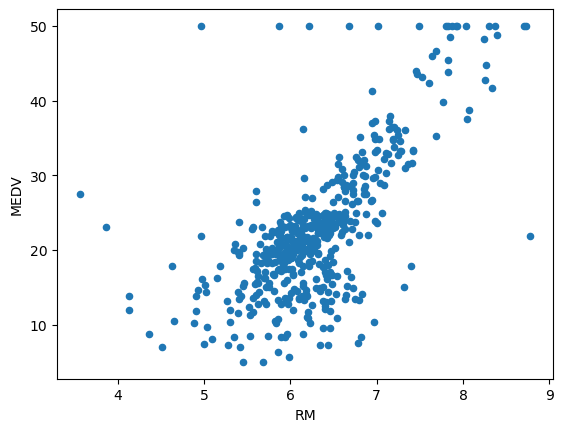

In [5]:
Boston.plot.scatter('RM', 'MEDV');

In [6]:
X = Boston[Boston.columns[:-1]]
Y = Boston['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [10]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
sc_X = StandardScaler()
X_train_ = sc_X.fit_transform(X_train)
X_test_ = sc_X.transform(X_test)

In [11]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (354, 13), Y: (354,)
Test  Dataset Size - X: (152, 13), Y: (152,)


In [12]:
# Model Building
lm = LinearRegression()
lm.fit(X_train_, Y_train)
predictions = lm.predict(X_test_)

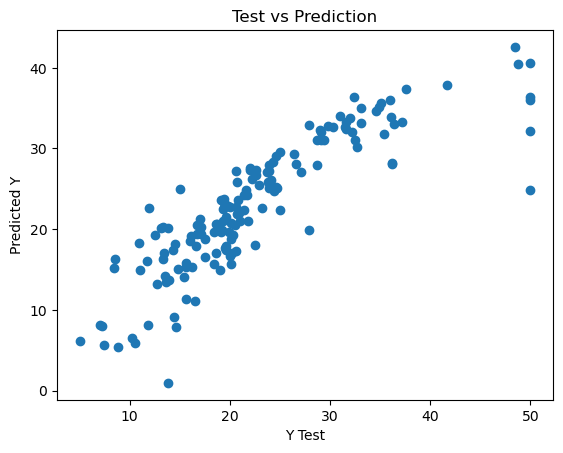

In [19]:
# Model Visualization
plt.scatter(Y_test, predictions);
plt.xlabel('Y Test');
plt.ylabel('Predicted Y');
plt.title('Test vs Prediction');

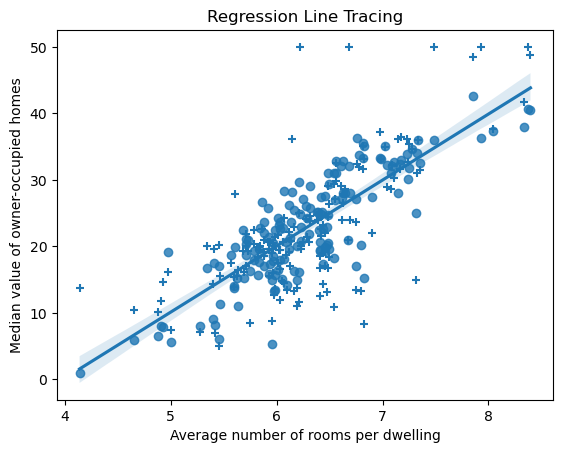

In [40]:
sns.regplot(x = X_test['RM'], y = predictions);
plt.scatter(X_test['RM'], Y_test, marker = '+');
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('Median value of owner-occupied homes');
plt.title('Regression Line Tracing');

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 3.416431933858744
Mean Square Error: 23.331870700175404
Root Mean Square Error: 4.8303075161086175
